In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
from math import isnan
import matplotlib.pyplot as plt
import matplotlib
import datetime
# Numpy options
np.random.seed(78)
# Pandas options
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 400)
# Matplotlib options
matplotlib.rcParams['image.cmap'] = 'viridis'
%matplotlib inline
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (20,10)

In [2]:
aadt = pd.read_csv('aadt_counts_sep.csv', low_memory=False)
aadt.head()

,Latitude,Longitude,Counts
0,40.598310,-73.985797,3812
1,40.597848,-74.046164,11963
2,40.675265,-73.865689,28963
3,40.623325,-74.113503,8760
4,40.760473,-73.961751,13106


In [3]:
aadt['Lat'] = aadt['Latitude'].round(2)
aadt['Long'] = aadt['Longitude'].round(2)

for x in range (0,len(aadt)):
    aadt.set_value(x, 'LOCATION', "(" + str(aadt.at[x, 'Lat']) + "," + str(aadt.at[x, 'Long']) + ")")
aadt = aadt[['Latitude','Longitude','Lat','Long','LOCATION','Counts']]
aadt = aadt.reset_index(drop=True)
aadt.head()

,Latitude,Longitude,Lat,Long,LOCATION,Counts
0,40.598310,-73.985797,40.60,-73.99,"(40.6,-73.99)",3812
1,40.597848,-74.046164,40.60,-74.05,"(40.6,-74.05)",11963
2,40.675265,-73.865689,40.68,-73.87,"(40.68,-73.87)",28963
3,40.623325,-74.113503,40.62,-74.11,"(40.62,-74.11)",8760
4,40.760473,-73.961751,40.76,-73.96,"(40.76,-73.96)",13106


In [4]:
collisions = pd.read_csv('collisions.csv', low_memory=False)

In [5]:
collisions = collisions[pd.notnull(collisions['LOCATION'])]
collisions = collisions[collisions['LATITUDE'] > 40.45]
collisions = collisions[collisions['LATITUDE'] < 40.95]
collisions = collisions[collisions['LONGITUDE'] > -74.3]
collisions = collisions[collisions['LONGITUDE'] < -73.69]
collisions = collisions.reset_index(drop=True)
collisions['LONG'] = collisions['LONGITUDE'].round(2)
collisions['LAT'] = collisions['LATITUDE'].round(2)

In [6]:
for x in range (0,len(collisions)):
    collisions.set_value(x, 'LOCATION', "(" + str(collisions.at[x, 'LAT']) + "," + str(collisions.at[x, 'LONG']) + ")")
collisions.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,LONG,LAT
0,03/24/2017,0:00,BRONX,10458,40.866047,-73.882744,"(40.87,-73.88)",SOUTHERN BOULEVARD,BEDFORD PARK BOULEVARD,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inexperience,NaN,NaN,NaN,3638739,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,-73.88,40.87
1,03/24/2017,0:00,BROOKLYN,11220,40.633470,-74.021020,"(40.63,-74.02)",BAY RIDGE AVENUE,5 AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3638505,PASSENGER VEHICLE,PICK-UP TRUCK,NaN,NaN,NaN,-74.02,40.63
2,03/24/2017,0:00,BROOKLYN,11222,40.728416,-73.952415,"(40.73,-73.95)",CALYER STREET,LEONARD STREET,NaN,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3638289,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,-73.95,40.73
3,03/24/2017,0:00,QUEENS,11104,40.748928,-73.913750,"(40.75,-73.91)",50 STREET,39 AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3638133,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,-73.91,40.75
4,03/24/2017,0:00,QUEENS,11354,40.766445,-73.834040,"(40.77,-73.83)",33 AVENUE,MILLER STREET,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638189,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,-73.83,40.77


In [7]:
len(collisions)

800678

In [8]:
len(collisions[collisions['LOCATION'].isin(aadt['LOCATION'])])

712951

In [9]:
df = pd.merge(collisions, aadt, on='LOCATION' , how='left')

In [10]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,LONG,LAT,Latitude,Longitude,Lat,Long,Counts
0,03/24/2017,0:00,BRONX,10458,40.866047,-73.882744,"(40.87,-73.88)",SOUTHERN BOULEVARD,BEDFORD PARK BOULEVARD,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inexperience,NaN,NaN,NaN,3638739,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,-73.88,40.87,40.873549,-73.878707,40.87,-73.88,6983.0
1,03/24/2017,0:00,BRONX,10458,40.866047,-73.882744,"(40.87,-73.88)",SOUTHERN BOULEVARD,BEDFORD PARK BOULEVARD,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inexperience,NaN,NaN,NaN,3638739,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,-73.88,40.87,40.866789,-73.880807,40.87,-73.88,27030.0
2,03/24/2017,0:00,BRONX,10458,40.866047,-73.882744,"(40.87,-73.88)",SOUTHERN BOULEVARD,BEDFORD PARK BOULEVARD,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inexperience,NaN,NaN,NaN,3638739,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,-73.88,40.87,40.872257,-73.882860,40.87,-73.88,2205.0
3,03/24/2017,0:00,BRONX,10458,40.866047,-73.882744,"(40.87,-73.88)",SOUTHERN BOULEVARD,BEDFORD PARK BOULEVARD,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inexperience,NaN,NaN,NaN,3638739,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,-73.88,40.87,40.868071,-73.882620,40.87,-73.88,17614.0
4,03/24/2017,0:00,BROOKLYN,11220,40.633470,-74.021020,"(40.63,-74.02)",BAY RIDGE AVENUE,5 AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3638505,PASSENGER VEHICLE,PICK-UP TRUCK,NaN,NaN,NaN,-74.02,40.63,40.631436,-74.018889,40.63,-74.02,3659.0


In [11]:
df = df.drop_duplicates(df.columns[0:31], keep='last')

In [12]:
len(df)

800678

In [13]:
df = df[df['Counts'].notnull()]

In [14]:
len(df)

712951

In [15]:
df = df.reset_index(drop=True)

In [16]:
for x in range (0,len(df)):
    df.set_value(x, 'LOCATION', "(" + str(df.at[x, 'LATITUDE']) + "," + str(df.at[x, 'LONGITUDE']) + ")")
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,LONG,LAT,Latitude,Longitude,Lat,Long,Counts
0,03/24/2017,0:00,BRONX,10458,40.866047,-73.882744,"(40.866047,-73.882744)",SOUTHERN BOULEVARD,BEDFORD PARK BOULEVARD,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inexperience,NaN,NaN,NaN,3638739,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,-73.88,40.87,40.868071,-73.882620,40.87,-73.88,17614.0
1,03/24/2017,0:00,BROOKLYN,11220,40.633470,-74.021020,"(40.63347,-74.02102)",BAY RIDGE AVENUE,5 AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3638505,PASSENGER VEHICLE,PICK-UP TRUCK,NaN,NaN,NaN,-74.02,40.63,40.631436,-74.018889,40.63,-74.02,3659.0
2,03/24/2017,0:00,BROOKLYN,11222,40.728416,-73.952415,"(40.728416,-73.952415)",CALYER STREET,LEONARD STREET,NaN,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3638289,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,-73.95,40.73,40.729028,-73.950569,40.73,-73.95,33440.0
3,03/24/2017,0:00,QUEENS,11104,40.748928,-73.913750,"(40.748928,-73.91375)",50 STREET,39 AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3638133,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,-73.91,40.75,40.745260,-73.906463,40.75,-73.91,6428.0
4,03/24/2017,0:00,QUEENS,11354,40.766445,-73.834040,"(40.766445,-73.83404)",33 AVENUE,MILLER STREET,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638189,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,-73.83,40.77,40.770097,-73.826439,40.77,-73.83,5054.0


In [20]:
counts = df.groupby('LOCATION').count()
counts.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,LONG,LAT,Latitude,Longitude,Lat,Long,Counts
LOCATION,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"(40.500737,-74.2488483)",2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,0,0,0,2,2,2,0,0,0,2,2,2,2,2,2,2
"(40.5023006,-74.2455064)",1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,0,1,1,1,1,1,1,1
"(40.5027754,-74.2518296)",4,4,4,4,4,4,4,4,0,4,4,4,4,4,4,4,4,4,0,0,0,0,4,4,0,0,0,0,4,4,4,4,4,4,4
"(40.502878,-74.2513626)",2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,0,0,0,2,2,2,0,0,0,2,2,2,2,2,2,2
"(40.5031959,-74.2478182)",1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,1,1,1,1


In [21]:
for x in range (0,len(df)):
    df.at[x,'Collision Rate'] = (counts.at[df.at[x,'LOCATION'],'DATE']*1000000)/(df.at[x,'Counts']*365*5)

In [23]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,LONG,LAT,Latitude,Longitude,Lat,Long,Counts,Collision Rate
0,03/24/2017,0:00,BRONX,10458,40.866047,-73.882744,"(40.866047,-73.882744)",SOUTHERN BOULEVARD,BEDFORD PARK BOULEVARD,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inexperience,NaN,NaN,NaN,3638739,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,-73.88,40.87,40.868071,-73.882620,40.87,-73.88,17614.0,0.093326
1,03/24/2017,0:00,BROOKLYN,11220,40.633470,-74.021020,"(40.63347,-74.02102)",BAY RIDGE AVENUE,5 AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3638505,PASSENGER VEHICLE,PICK-UP TRUCK,NaN,NaN,NaN,-74.02,40.63,40.631436,-74.018889,40.63,-74.02,3659.0,0.149753
2,03/24/2017,0:00,BROOKLYN,11222,40.728416,-73.952415,"(40.728416,-73.952415)",CALYER STREET,LEONARD STREET,NaN,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3638289,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,-73.95,40.73,40.729028,-73.950569,40.73,-73.95,33440.0,0.016386
3,03/24/2017,0:00,QUEENS,11104,40.748928,-73.913750,"(40.748928,-73.91375)",50 STREET,39 AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3638133,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,-73.91,40.75,40.745260,-73.906463,40.75,-73.91,6428.0,0.255730
4,03/24/2017,0:00,QUEENS,11354,40.766445,-73.834040,"(40.766445,-73.83404)",33 AVENUE,MILLER STREET,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638189,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,-73.83,40.77,40.770097,-73.826439,40.77,-73.83,5054.0,0.108418


In [24]:
print(df['Collision Rate'].max())
print(df['Collision Rate'].min())

169.921752082
0.00200534766061


In [25]:
len(df[df['Collision Rate'].isnull()])

0

In [35]:
for x in range (0,len(df)):
    df.set_value(x, 'LOCATION', "(" + str(df.at[x, 'LATITUDE']) + "," + str(df.at[x, 'LONGITUDE']) + ")")
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,LONG,LAT,Latitude,Longitude,Lat,Long,Counts,Collision Rate
0,03/24/2017,0:00,BRONX,10458,40.866047,-73.882744,"(40.866047,-73.882744)",SOUTHERN BOULEVARD,BEDFORD PARK BOULEVARD,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inexperience,NaN,NaN,NaN,3638739,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,-73.88,40.87,40.868071,-73.882620,40.87,-73.88,17614.0,39.290042
1,03/24/2017,0:00,BROOKLYN,11220,40.633470,-74.021020,"(40.63347,-74.02102)",BAY RIDGE AVENUE,5 AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3638505,PASSENGER VEHICLE,PICK-UP TRUCK,NaN,NaN,NaN,-74.02,40.63,40.631436,-74.018889,40.63,-74.02,3659.0,210.851831
2,03/24/2017,0:00,BROOKLYN,11222,40.728416,-73.952415,"(40.728416,-73.952415)",CALYER STREET,LEONARD STREET,NaN,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3638289,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,-73.95,40.73,40.729028,-73.950569,40.73,-73.95,33440.0,32.214721
3,03/24/2017,0:00,QUEENS,11104,40.748928,-73.913750,"(40.748928,-73.91375)",50 STREET,39 AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3638133,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,-73.91,40.75,40.745260,-73.906463,40.75,-73.91,6428.0,100.161110
4,03/24/2017,0:00,QUEENS,11354,40.766445,-73.834040,"(40.766445,-73.83404)",33 AVENUE,MILLER STREET,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638189,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,-73.83,40.77,40.770097,-73.826439,40.77,-73.83,5054.0,119.043102


In [26]:
df = df.drop(df.columns[29:35], axis=1)

In [27]:
df.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate
0,03/24/2017,0:00,BRONX,10458,40.866047,-73.882744,"(40.866047,-73.882744)",SOUTHERN BOULEVARD,BEDFORD PARK BOULEVARD,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Driver Inexperience,NaN,NaN,NaN,3638739,SPORT UTILITY / STATION WAGON,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,17614.0,0.093326
1,03/24/2017,0:00,BROOKLYN,11220,40.633470,-74.021020,"(40.63347,-74.02102)",BAY RIDGE AVENUE,5 AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3638505,PASSENGER VEHICLE,PICK-UP TRUCK,NaN,NaN,NaN,3659.0,0.149753
2,03/24/2017,0:00,BROOKLYN,11222,40.728416,-73.952415,"(40.728416,-73.952415)",CALYER STREET,LEONARD STREET,NaN,0,0,0,0,0,0,0,0,Failure to Yield Right-of-Way,Unspecified,NaN,NaN,NaN,3638289,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,33440.0,0.016386
3,03/24/2017,0:00,QUEENS,11104,40.748928,-73.913750,"(40.748928,-73.91375)",50 STREET,39 AVENUE,NaN,0,0,0,0,0,0,0,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3638133,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,6428.0,0.255730
4,03/24/2017,0:00,QUEENS,11354,40.766445,-73.834040,"(40.766445,-73.83404)",33 AVENUE,MILLER STREET,NaN,0,0,0,0,0,0,0,0,Unspecified,NaN,NaN,NaN,NaN,3638189,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,5054.0,0.108418


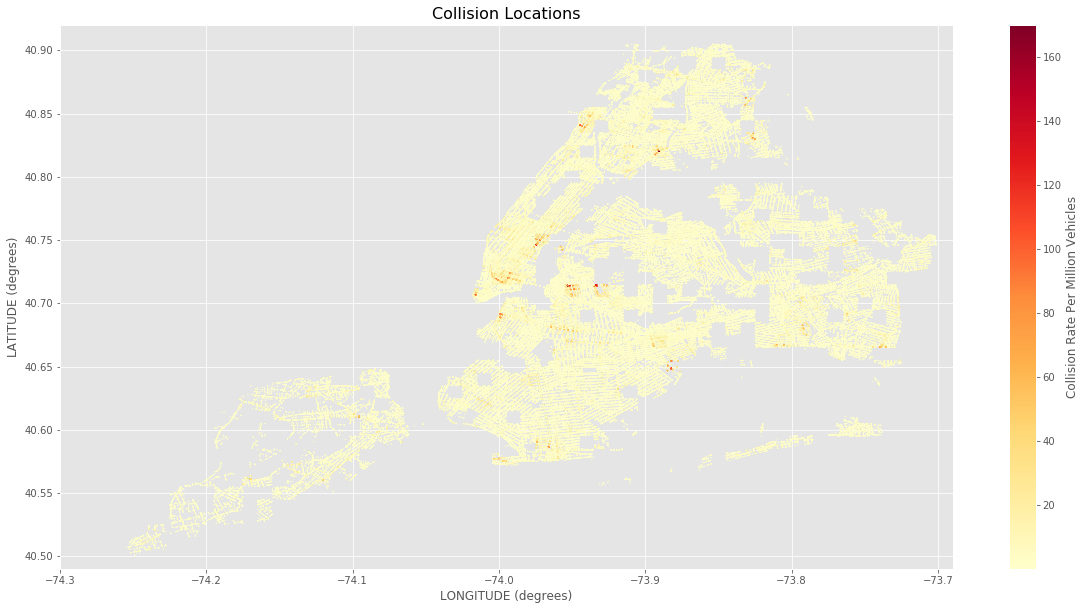

In [43]:
plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['Collision Rate'], s=.5, cmap=plt.cm.YlOrRd)
plt.xlabel('LONGITUDE (degrees)', fontsize=12)
plt.ylabel('LATITUDE (degrees)', fontsize=12)
plt.title('Collision Locations', fontsize=16)
plt.ylim(40.49,40.92)
plt.xlim(-74.3,-73.69)
plt.colorbar(label='Collision Rate Per Million Vehicles')
plt.show()

In [65]:
danger_areas = df[df['Collision Rate'] >= 80]

In [66]:
len(danger_areas)

3875

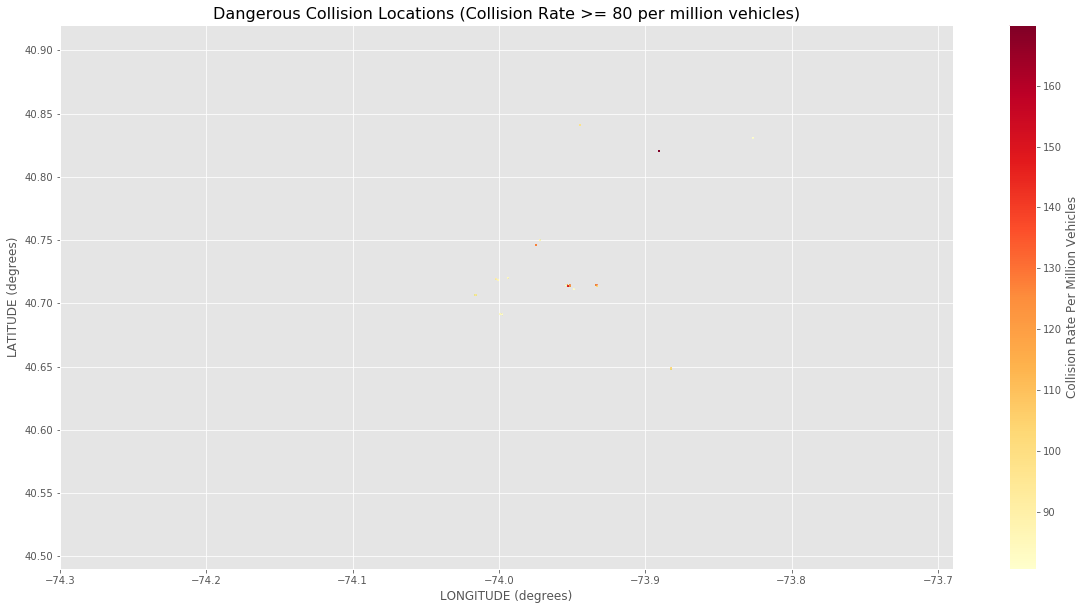

In [67]:
plt.scatter(danger_areas['LONGITUDE'], danger_areas['LATITUDE'], c=danger_areas['Collision Rate'], s=.5, cmap=plt.cm.YlOrRd)
plt.xlabel('LONGITUDE (degrees)', fontsize=12)
plt.ylabel('LATITUDE (degrees)', fontsize=12)
plt.title('Dangerous Collision Locations (Collision Rate >= 80 per million vehicles)', fontsize=16)
plt.ylim(40.49,40.92)
plt.xlim(-74.3,-73.69)
plt.colorbar(label='Collision Rate Per Million Vehicles')
plt.show()

In [68]:
danger_areas = df[df['Collision Rate'] >= 160]

In [69]:
len(danger_areas)

405

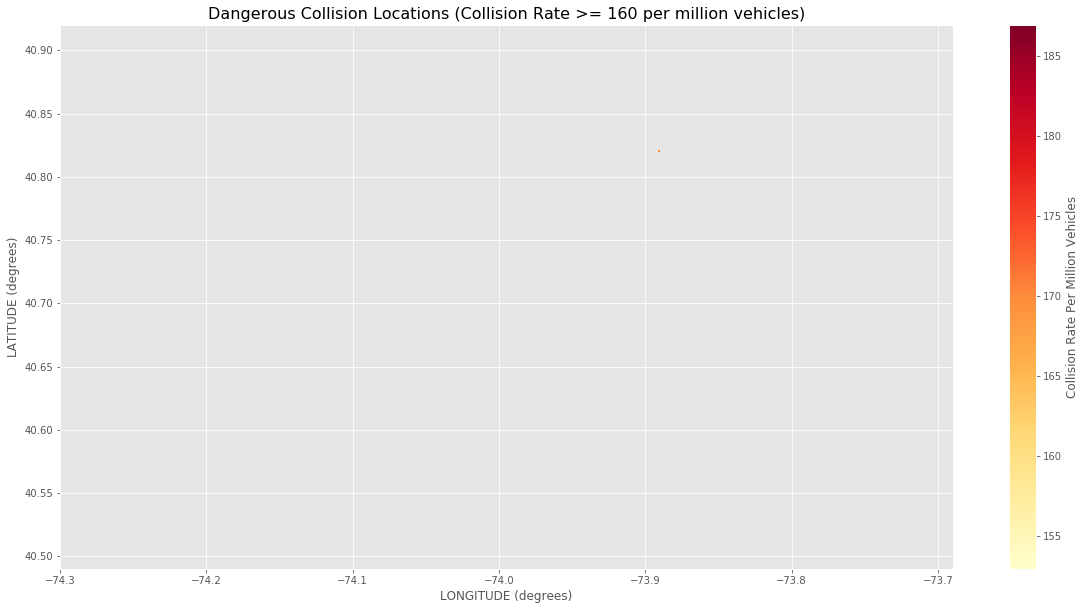

In [70]:
plt.scatter(danger_areas['LONGITUDE'], danger_areas['LATITUDE'], c=danger_areas['Collision Rate'], s=.5, cmap=plt.cm.YlOrRd)
plt.xlabel('LONGITUDE (degrees)', fontsize=12)
plt.ylabel('LATITUDE (degrees)', fontsize=12)
plt.title('Dangerous Collision Locations (Collision Rate >= 160 per million vehicles)', fontsize=16)
plt.ylim(40.49,40.92)
plt.xlim(-74.3,-73.69)
plt.colorbar(label='Collision Rate Per Million Vehicles')
plt.show()

In [71]:
danger_areas

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,Counts,Collision Rate
31710,01/16/2017,10:00,BRONX,10459,40.820189,-73.890675,"(40.820189,-73.8906752)",BRUCKNER BOULEVARD,HUNTS POINT AVENUE,NaN,0,0,0,0,0,0,0,0,Passing or Lane Usage Improper,Passing or Lane Usage Improper,NaN,NaN,NaN,3599580,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,1306.0,169.921752
36373,01/04/2017,7:20,BRONX,10459,40.820189,-73.890675,"(40.820189,-73.8906752)",BRUCKNER BOULEVARD,HUNTS POINT AVENUE,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3592104,SPORT UTILITY / STATION WAGON,PICK-UP TRUCK,NaN,NaN,NaN,1306.0,169.921752
37183,01/01/2017,20:47,BRONX,10459,40.820189,-73.890675,"(40.820189,-73.8906752)",BRUCKNER BOULEVARD,HUNTS POINT AVENUE,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3591324,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,1306.0,169.921752
37652,12/30/2016,13:00,BRONX,10459,40.820189,-73.890675,"(40.820189,-73.8906752)",HUNTS POINT AVENUE,BRUCKNER BOULEVARD,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3589732,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,1306.0,169.921752
39900,12/23/2016,14:50,BRONX,10459,40.820189,-73.890675,"(40.820189,-73.8906752)",HUNTS POINT AVENUE,BRUCKNER BOULEVARD,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3586447,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,1306.0,169.921752
40157,12/23/2016,9:20,BRONX,10459,40.820189,-73.890675,"(40.820189,-73.8906752)",BRUCKNER BOULEVARD,HUNTS POINT AVENUE,NaN,0,0,0,0,0,0,0,0,Unspecified,Unspecified,NaN,NaN,NaN,3586449,PICK-UP TRUCK,PASSENGER VEHICLE,NaN,NaN,NaN,1306.0,169.921752
40522,12/22/2016,7:43,BRONX,10459,40.820189,-73.890675,"(40.820189,-73.8906752)",BRUCKNER BOULEVARD,HUNTS POINT AVENUE,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,Unspecified,NaN,NaN,3585074,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,1306.0,169.921752
41248,12/20/2016,19:44,BRONX,10459,40.820189,-73.890675,"(40.820189,-73.8906752)",BRUCKNER BOULEVARD,HUNTS POINT AVENUE,NaN,0,0,0,0,0,0,0,0,Following Too Closely,Unspecified,Unspecified,NaN,NaN,3585026,PASSENGER VEHICLE,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,1306.0,169.921752
41741,12/19/2016,21:20,BRONX,10459,40.820189,-73.890675,"(40.820189,-73.8906752)",HUNTS POINT AVENUE,BRUCKNER BOULEVARD,NaN,0,0,0,0,0,0,0,0,Other Vehicular,NaN,NaN,NaN,NaN,3584406,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,1306.0,169.921752
42129,12/18/2016,22:45,BRONX,10459,40.820189,-73.890675,"(40.820189,-73.8906752)",BRUCKNER BOULEVARD,HUNTS POINT AVENUE,NaN,1,0,0,0,0,0,1,0,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN,3584390,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,1306.0,169.921752


In [72]:
len(danger_areas[danger_areas['LOCATION'] != '(40.820189,-73.8906752)'])

0

Hunts Point Ave and Bruckner Boulevard is our most dangerous intersection after normalization.

In [74]:
df.to_csv('collisions_w_rate.csv')